In [1]:
from tensorflow.keras.datasets import imdb 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten
from tensorflow.keras.utils import to_categorical as to_cat
import numpy as np ; import matplotlib.pyplot as plt
#import cv2,os 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

<img src=attachment:99077bac-184d-4412-8988-5b83767a1447.png  height="150" width="700" />
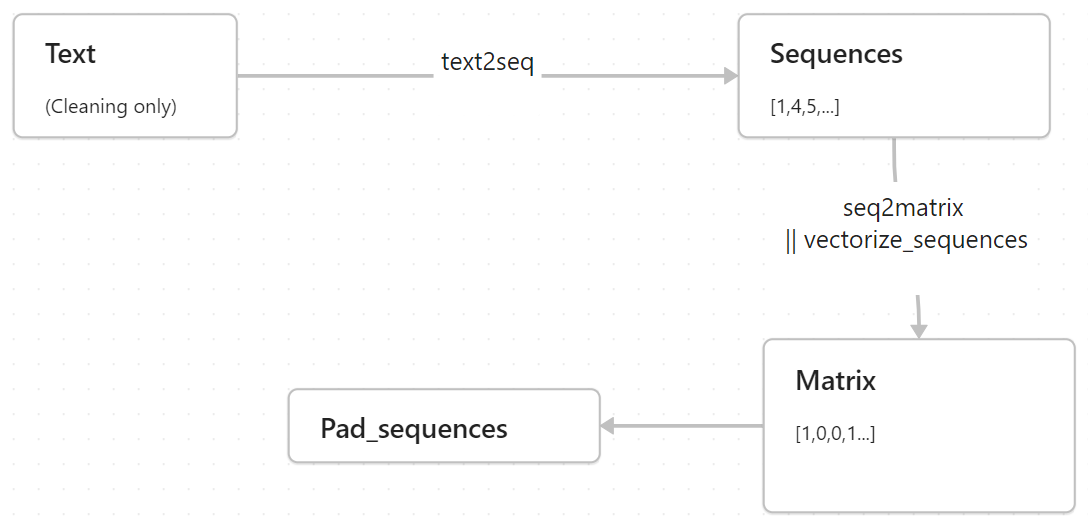

In [2]:
(x_train,y_train),(x_test,y_test) =  imdb.load_data(num_words=10000)

In [3]:
x_train.shape,y_train.shape

((25000,), (25000,))

In [4]:
word_index = imdb.get_word_index()

In [5]:
token = Tokenizer(num_words=10000)
token.fit_on_sequences(x_train)

In [6]:
x_train_vector =  token.sequences_to_matrix(x_train)
x_test_vector =  token.sequences_to_matrix(x_test)

In [7]:
x_train_vector.shape

(25000, 10000)

In [8]:
x_train_vector[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
maxlen = 100
trunc_type = "post"
pad_type="post"
num_words= 10000
embed_dim = 128

In [10]:
x_train_padded =  pad_sequences(x_train_vector,padding=pad_type,truncating=trunc_type,maxlen=maxlen)
x_test_padded =  pad_sequences(x_test_vector,padding=pad_type,truncating=trunc_type,maxlen=maxlen)

In [11]:
x_train_padded.shape

(25000, 100)

In [12]:
x_train_padded[0]

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [13]:
y_train_cat = to_cat(y_train)
y_test_cat = to_cat(y_test)

In [14]:
y_train_cat.shape

(25000, 2)

In [15]:
np.unique(np.array(y_train_cat))

array([0., 1.])

DENSE LAYER

In [30]:
model= Sequential([

    Dense(64,activation="relu"),
    Dense(32,activation="relu"),
    Dense(2,activation="softmax")
])
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])

In [31]:
history =  model.fit(x_train_padded,y_train,epochs=10,validation_data=(x_test_padded,y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - acc: 0.6484 - loss: 0.6200 - val_acc: 0.7019 - val_loss: 0.5697
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - acc: 0.7046 - loss: 0.5648 - val_acc: 0.7031 - val_loss: 0.5657
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - acc: 0.7049 - loss: 0.5631 - val_acc: 0.7038 - val_loss: 0.5679
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - acc: 0.7151 - loss: 0.5512 - val_acc: 0.7012 - val_loss: 0.5682
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - acc: 0.7184 - loss: 0.5458 - val_acc: 0.6983 - val_loss: 0.5716
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - acc: 0.7270 - loss: 0.5351 - val_acc: 0.6991 - val_loss: 0.5752
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - acc: 0.7390 - loss: 0.5232 - val_acc: 0.6986 - val_loss: 0.5805
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - acc: 0.7464 - loss: 0.5088 - val_acc: 0.6968 - val_loss: 0.5837
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 

In [32]:
loss,acc =  model.evaluate(x_test_padded,y_test)
acc

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.6858 - loss: 0.5951


0.6910799741744995

In [16]:
del model 

NameError: name 'model' is not defined

EMBEDDING MODEL

In [17]:
model = Sequential([
    Embedding(input_dim=num_words,output_dim=150,input_length=maxlen),
    Flatten(),
    Dense(64,activation="relu"),
    Dense(64,activation="relu"),
    Dense(2,activation="softmax")
])
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])
history  = model.fit(x_train_padded,y_train_cat,validation_data=(x_test_padded,y_test_cat),epochs=10)

Epoch 1/10


C:\codes\machineL\CODING\Text\text_env\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 39ms/step - acc: 0.6634 - loss: 0.6033 - val_acc: 0.7007 - val_loss: 0.5673
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - acc: 0.6989 - loss: 0.5703 - val_acc: 0.7069 - val_loss: 0.5678
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 39ms/step - acc: 0.7040 - loss: 0.5589 - val_acc: 0.7068 - val_loss: 0.5691
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step - acc: 0.7179 - loss: 0.5484 - val_acc: 0.7012 - val_loss: 0.5776
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 39ms/step - acc: 0.7276 - loss: 0.5391 - val_acc: 0.6984 - val_loss: 0.5743
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 33ms/step - acc: 0.7333 - loss: 0.5290 - val_acc: 0.6994 - val_loss: 0.5809
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - acc: 0.7425 - loss: 0.5141 - val_acc: 0.6868 - val_loss: 0.6017
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - acc: 0.7527 - loss: 0.4991 - val_acc: 0.6889 - val_loss: 0.5946
Epoch 9/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/st

In [19]:
loss,acc =  model.evaluate(x_test_padded,y_test_cat)
acc

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - acc: 0.6853 - loss: 0.6202


0.6868799924850464

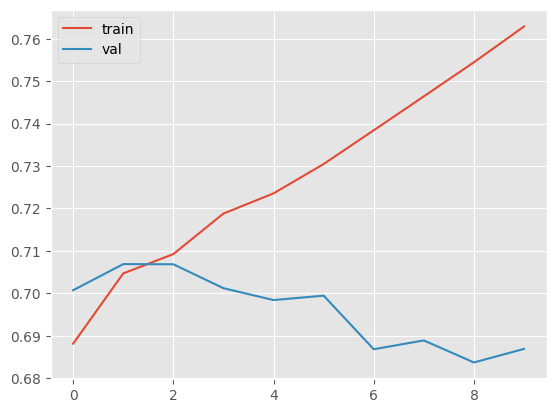

In [20]:
## Accuracy
plt.style.use("ggplot")
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(["train","val"],loc='upper left')

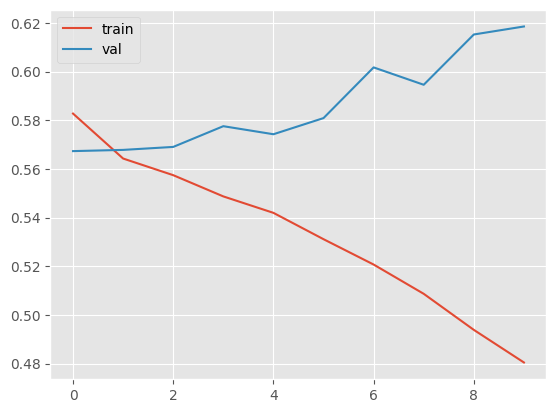

In [21]:
## Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["train", "val"],loc='upper left')


In [37]:
reverse_word_map = dict(map(reversed, word_index.items()))

# Function takes a tokenized sentence and returns the words # src: stackoverflow 
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)

In [36]:
" ".join(sequence_to_text(x_train[34]))

"the plot one brand for and fine direction sentence it is defense desperate better as it his had wasn't old of shelf steven rich br defense resemblance way while say manage environment obviously up wise and but you accent this of father star br of screwed and fine direction sentence story at still aged movie is disappointed hard and br and gotten if is their has flow are by act is and bounty examples in sober of home br make throat are of because is delighted and bounty examples in car of sentence new that well protagonist think up care agree and direction sentence lifted is time harry you make and done front cool portraying who circus boring to prepare deliberate i i virus fame slimy animation entertained eerie is cancelled acting and daughters and z and electronic better of tess slice br elvis were flashbacks family usually this ship no and ways he mentally who is him picture virus not is direction sentence risk this of fail br my in known of virus watch as slimy friend cardboard hal

MAKING PREDICTIONS 

In [49]:
preds = model.predict(x_test_padded)

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


In [56]:
pred =  np.argmax(preds,axis=1)
pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)